<केंद्र><h1>अध्याय 10 समय श्रृंखला डेटा</h1></केंद्र>

In [1]:
import numpy as np
import pandas as pd

## 1. समय श्रृंखला में मूल वस्तुएँ

समय श्रृंखला की अवधारणा दैनिक जीवन में बहुत आम है, लेकिन एक विशिष्ट समय श्रृंखला घटना के लिए, इसे कई समय वस्तुओं के परिप्रेक्ष्य से वर्णित किया जा सकता है। उदाहरण के लिए, आपको सोमवार, 7 सितंबर, 2020 को सुबह 8 बजे कक्षा में जाना होगा। यह कक्षा उस दिन सुबह 10 बजे समाप्त होगी। इसमें समय की कौन सी अवधारणाएँ शामिल हैं?

* सबसे पहले, दिनांक समय की अवधारणा दिखाई देगी, अर्थात, '2020-9-7 08:00:00' और '2020-9-7 10:00:00' के दो समय बिंदु क्रमशः वर्ग और का प्रतिनिधित्व करते हैं। कक्षा से बाहर निकलने का समय समाप्त होता है, जिसे 'पांडा' में 'टाइमस्टैम्प' कहा जाता है। उसी समय, टाइमस्टैम्प की एक श्रृंखला एक `DatetimeIndex` बना सकती है, और इसे `Series` में रखने के बाद, `Series` का प्रकार `datetime64[ns]` हो जाता है, या यदि कोई समय क्षेत्र शामिल होता है, तो यह है `datetime64[ns, tz]`, जहां tz टाइमज़ोन का संक्षिप्त रूप है।

* दूसरा, समय डेल्टा की अवधारणा प्रकट होगी, अर्थात, कक्षा के लिए आवश्यक समय दो `टाइमस्टैम्प` के बीच के अंतर के परिणामस्वरूप समय का अंतर होगा, जिसे पांडा में `टाइमडेल्टा` द्वारा दर्शाया गया है। इसी तरह, समय के अंतर की एक श्रृंखला `टाइमडेल्टाइंडेक्स` का गठन करती है, और इसे `सीरीज़` में रखने के बाद, `सीरीज़` का वर्गप्रकार `timedelta64[ns]` हो जाता है।

* तीसरा, समय अवधि की अवधारणा सामने आएगी, यानी कक्षाएं 8 बजे से 10 बजे तक जारी रहेंगी, जिसे `पांडा` में `अवधि` द्वारा दर्शाया गया है। इसी प्रकार, समय अवधि की एक श्रृंखला `PeriodIndex` बनाती है, और इसे `Series` में रखने के बाद, `Series` का प्रकार `Period` हो जाता है।

* चौथा, दिनांक ऑफसेट की अवधारणा दिखाई देगी। मान लीजिए कि आपको केवल यह पता है कि आपको सितंबर के पहले सोमवार को सुबह 8 बजे कक्षा में जाना है, लेकिन विशिष्ट तिथि नहीं पता है, तो आपको इस प्रकार की आवश्यकता को संभालने के लिए एक प्रकार की आवश्यकता होगी। . दूसरे उदाहरण के लिए, यदि आप जानना चाहते हैं कि 7 सितंबर, 2020 के बाद 30वां कार्य दिवस कौन सा है, तो समय का अंतर आपकी समस्या का समाधान नहीं कर सकता है, इसलिए 'पांडा' में 'DateOffset' दिखाई देता है। साथ ही, 'पांडा' में समय ऑफसेट के कॉलम के लिए विशेष रूप से डिज़ाइन किया गया कोई भंडारण प्रकार नहीं है, क्योंकि मांग बल्कि अजीब है, हमें केवल एक एकीकृत विशेष तिथि ऑफसेट बनाने की आवश्यकता है समय सुविधाओं के एक बैच के लिए.

इस सरल उदाहरण के माध्यम से, आप आधिकारिक दस्तावेज़ (https://pandas.pydata.org/docs/user_guide/timeseries.html#overview) में इस [तालिका] को आसानी से सारांशित कर सकते हैं:|संकल्पना |. एकल तत्व प्रकार |. सरणी प्रकार |
|:----------|:----------|:-----------|:---------- |
| दिनांक समय | `टाइमस्टैम्प` | `डेटटाइमइंडेक्स` | `डेटटाइम64[एनएस]`|
|समय डेल्टा |. `टाइमडेल्टा` |. `टाइमडेल्टा64[एनएस]`|
|समय अवधि |. `पीरियडइंडेक्स` |
|दिनांक ऑफसेट | `दिनांकऑफसेट`| `कोई नहीं` | `कोई नहीं`|

चूँकि समयावधि वस्तु `पीरियड/पीरियडइंडेक्स` की उपयोग आवृत्ति अधिक नहीं है, इसलिए हम इसकी व्याख्या नहीं करेंगे, लेकिन केवल टाइमस्टैम्प अनुक्रम, समय अंतर अनुक्रम और दिनांक ऑफसेट के बारे में संबंधित सामग्री की व्याख्या करेंगे।

## 2. टाइमस्टैम्प
### 1. टाइमस्टैम्प का निर्माण और गुण

एकल टाइमस्टैम्प का निर्माण `pd.Timestamp` का उपयोग करके कार्यान्वित किया जाता है, और आम तौर पर सामान्य दिनांक प्रारूपों को सफलतापूर्वक परिवर्तित किया जा सकता है:

In [2]:
ts = pd.Timestamp('2020/1/1')
ts

Timestamp('2020-01-01 00:00:00')

In [3]:
ts = pd.Timestamp('2020-1-1 08:10:30')
ts

Timestamp('2020-01-01 08:10:30')

विशिष्ट मान `वर्ष, माह, दिन, घंटा, मिनट, सेकंड` के माध्यम से प्राप्त किए जा सकते हैं:

In [4]:
ts.year

2020

In [5]:
ts.month

1

In [6]:
ts.day

1

In [7]:
ts.hour

8

In [8]:
ts.minute

10

In [9]:
ts.second

30

`पांडा` में, टाइमस्टैम्प की न्यूनतम सटीकता नैनोसेकंड `ns` है क्योंकि 64-बिट स्टोरेज का उपयोग किया जाता है, प्रतिनिधित्व योग्य समय सीमा की गणना लगभग निम्नानुसार की जा सकती है:
$$\rm समय\,सीमा = \frac{2^{64}}{10^9\गुना 60\गुना 60\गुना 24\गुना 365} \लगभग 585 (वर्ष)$$
टाइमस्टैम्प द्वारा दर्शाई गई सीमा `pd.Timestamp.max` और `pd.Timestamp.min` के माध्यम से प्राप्त की जा सकती है, और आप देख सकते हैं कि अंतराल द्वारा दर्शाई गई वर्षों की वास्तविक संख्या ऊपर की गणना के अनुसार है:

In [10]:
pd.Timestamp.max

Timestamp('2262-04-11 23:47:16.854775807')

In [11]:
pd.Timestamp.min

Timestamp('1677-09-21 00:12:43.145225')

In [12]:
pd.Timestamp.max.year - pd.Timestamp.min.year

585

### 2. दिनांक समय अनुक्रम का निर्माण

टाइमस्टैम्प का एक सेट एक समय श्रृंखला बना सकता है, जिसे `to_datetime` और `date_range` का उपयोग करके उत्पन्न किया जा सकता है। उनमें से, `to_datetime` टाइमस्टैम्प प्रारूप में वस्तुओं की एक सूची को `datetime64[ns]` प्रकार की समय श्रृंखला में परिवर्तित कर सकता है:

In [13]:
pd.to_datetime(['2020-1-1', '2020-1-3', '2020-1-6'])
df = pd.read_csv('../data/learn_pandas.csv')
s = pd.to_datetime(df.Test_Date)
s.head()

0   2019-10-05
1   2019-09-04
2   2019-09-12
3   2020-01-03
4   2019-11-06
Name: Test_Date, dtype: datetime64[ns]

दुर्लभ मामलों में, जब टाइमस्टैम्प का प्रारूप रूपांतरण को संतुष्ट नहीं करता है, तो आप मिलान के लिए `प्रारूप` के उपयोग को बाध्य कर सकते हैं:

In [14]:
temp = pd.to_datetime(['2020\\1\\1','2020\\1\\3'],format='%Y\\%m\\%d')
temp

DatetimeIndex(['2020-01-01', '2020-01-03'], dtype='datetime64[ns]', freq=None)

ध्यान दें कि चूँकि उपरोक्त `पांडा` के अंदर `श्रृंखला` के बजाय एक सूची है, जो लौटाया गया है वह `DatetimeIndex` है। यदि आप इसे `datetime64[ns]` के अनुक्रम में परिवर्तित करना चाहते हैं, तो आपको स्पष्ट रूप से `का उपयोग करना होगा। इसे परिवर्तित करने के लिए श्रृंखला`:

In [15]:
pd.Series(temp).head()

0   2020-01-01
1   2020-01-03
dtype: datetime64[ns]

इसके अलावा, एक `to_datetime` ऑपरेशन भी है जो एक तालिका के कई कॉलम समय विशेषताओं को एक समय श्रृंखला में जोड़ता है। इस समय कॉलम का नाम निम्नलिखित दिए गए समय कीवर्ड कॉलम नाम के अनुरूप होना चाहिए:

In [16]:
df_date_cols = pd.DataFrame({'year': [2020, 2020],
                             'month': [1, 1],
                             'day': [1, 2],
                             'hour': [10, 20],
                             'minute': [30, 50],
                             'second': [20, 40]})
pd.to_datetime(df_date_cols)

0   2020-01-01 10:30:20
1   2020-01-02 20:50:40
dtype: datetime64[ns]

`date_range` निरंतर अंतराल समय उत्पन्न करने की एक विधि है। इसके महत्वपूर्ण पैरामीटर `प्रारंभ, अंत, आवृत्ति, अवधि` हैं, जो क्रमशः प्रारंभ समय, समाप्ति समय, समय अंतराल और टाइमस्टैम्प की संख्या का प्रतिनिधित्व करते हैं। उनमें से, यदि चार में से तीन पैरामीटर निर्धारित किए जाते हैं, तो शेष एक को तदनुसार निर्धारित किया जाएगा। यहां ध्यान दें कि यदि इसे समापन बिंदु के रूप में उपयोग किया जाता है तो प्रारंभ या समाप्ति तिथि शामिल की जाएगी:

In [17]:
pd.date_range('2020-1-1','2020-1-21', freq='10D') # 包含

DatetimeIndex(['2020-01-01', '2020-01-11', '2020-01-21'], dtype='datetime64[ns]', freq='10D')

In [18]:
pd.date_range('2020-1-1','2020-2-28', freq='10D')

DatetimeIndex(['2020-01-01', '2020-01-11', '2020-01-21', '2020-01-31',
               '2020-02-10', '2020-02-20'],
              dtype='datetime64[ns]', freq='10D')

In [19]:
pd.date_range('2020-1-1', '2020-2-28', periods=6) # 由于结束日期无法取到，freq不为10天

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-12 14:24:00',
               '2020-01-24 04:48:00', '2020-02-04 19:12:00',
               '2020-02-16 09:36:00', '2020-02-28 00:00:00'],
              dtype='datetime64[ns]', freq=None)

यहां `freq` पैरामीटर `DateOffset` ऑब्जेक्ट से निकटता से संबंधित है, और इसका विशिष्ट उपयोग धारा 4 में पेश किया जाएगा।
#### [अभ्यास]
`टाइमस्टैम्प` पर एक `मान` विशेषता परिभाषित की गई है। लौटाया गया पूर्णांक मान 1 जनवरी, 1970 को शून्य बजे से दिए गए टाइमस्टैम्प तक नैनोसेकंड की संख्या का प्रतिनिधित्व करता है। कृपया इस विशेषता का उपयोग यादृच्छिक रूप से उत्पन्न दिनांक अंतराल के निर्माण के लिए करें दिनांक अनुक्रम के अंतर्गत.
#### 【अंत】
अंत में, हम एक अनुक्रम `asfreq` की नमूना आवृत्ति को बदलने की एक विधि पेश करेंगे, जो किसी दिए गए `freq` के आधार पर अनुक्रम पर `reindex` के समान संचालन कर सकता है:

In [20]:
s = pd.Series(np.random.rand(5), index=pd.to_datetime(['2020-1-%d'%i for i in range(1,10,2)]))
s.head()

2020-01-01    0.393911
2020-01-03    0.703650
2020-01-05    0.650046
2020-01-07    0.726203
2020-01-09    0.126783
dtype: float64

In [21]:
s.asfreq('D').head()

2020-01-01    0.393911
2020-01-02         NaN
2020-01-03    0.703650
2020-01-04         NaN
2020-01-05    0.650046
Freq: D, dtype: float64

In [22]:
s.asfreq('12H').head()

2020-01-01 00:00:00    0.393911
2020-01-01 12:00:00         NaN
2020-01-02 00:00:00         NaN
2020-01-02 12:00:00         NaN
2020-01-03 00:00:00    0.703650
Freq: 12H, dtype: float64

####【टिप्पणी】
जैसा कि पहले उल्लेख किया गया है, `datetime64[ns]` को अनिवार्य रूप से एक बड़े पूर्णांक के रूप में समझा जा सकता है, इस प्रकार के अनुक्रम के लिए, आप अधिकतम टाइमस्टैम्प, न्यूनतम टाइमस्टैम्प और "औसत" टाइमस्टैम्प प्राप्त करने के लिए `max, min, औसत` का उपयोग कर सकते हैं। .
#### 【अंत】
### 3. डीटी ऑब्जेक्ट

जैसे श्रेणीगत डेटा और टेक्स्ट डेटा के संचालन को पूरा करने के लिए 'कैट, स्ट्र' को 'श्रेणी, स्ट्रिंग' के अनुक्रम पर परिभाषित किया गया है, वैसे ही 'डीटी' ऑब्जेक्ट को कई समय श्रृंखला से संबंधित संचालन को पूरा करने के लिए समय श्रृंखला प्रकार के अनुक्रम पर परिभाषित किया गया है। . यहां, `datetime64[ns]` प्रकार के लिए, इसे मोटे तौर पर तीन प्रकार के ऑपरेशनों में विभाजित किया जा सकता है: समय-संबंधित विशेषताओं को निकालना, यह निर्धारित करना कि टाइमस्टैम्प शर्तों को पूरा करता है या नहीं, और राउंडिंग ऑपरेशन।

पहले प्रकार के ऑपरेशन की सामान्य विशेषताओं में शामिल हैं: `दिनांक, समय, वर्ष, महीना, दिन, घंटा, मिनट, दूसरा, माइक्रोसेकंड, नैनोसेकंड, सप्ताह का दिन, वर्ष का दिन, सप्ताह का वर्ष, माह का दिन, तिमाही`, जहां क्रमशः `दिनों का महीना, तिमाही` का प्रतिनिधित्व होता है A महीने में दिन और तिमाही होते हैं।

In [23]:
s = pd.Series(pd.date_range('2020-1-1','2020-1-3', freq='D'))
s.dt.date

0    2020-01-01
1    2020-01-02
2    2020-01-03
dtype: object

In [24]:
s.dt.time

0    00:00:00
1    00:00:00
2    00:00:00
dtype: object

In [25]:
s.dt.day

0    1
1    2
2    3
dtype: int64

In [26]:
s.dt.daysinmonth

0    31
1    31
2    31
dtype: int64

इन विशेषताओं में, सबसे अधिक उपयोग किया जाने वाला `dayofweek` है, जो सप्ताह का दिन लौटाता है, सोमवार को 0, मंगलवार को 1, और इसी तरह:

In [27]:
s.dt.dayofweek

0    2
1    3
2    4
dtype: int64

इसके अलावा, आप `month_name,day_name` के माध्यम से अंग्रेजी महीने का नाम और सप्ताह का नाम वापस कर सकते हैं। ध्यान दें कि वे विशेषताएँ नहीं बल्कि विधियाँ हैं:

In [28]:
s.dt.month_name()

0    January
1    January
2    January
dtype: object

In [29]:
s.dt.day_name()

0    Wednesday
1     Thursday
2       Friday
dtype: object

दूसरे प्रकार के निर्णय ऑपरेशन का उपयोग मुख्य रूप से यह जांचने के लिए किया जाता है कि यह महीने/तिमाही/वर्ष का पहला या आखिरी दिन है:

In [30]:
s.dt.is_year_start # 还可选 is_quarter/month_start

0     True
1    False
2    False
dtype: bool

In [31]:
s.dt.is_year_end # 还可选 is_quarter/month_end

0    False
1    False
2    False
dtype: bool

तीसरे प्रकार के राउंडिंग ऑपरेशन में `राउंड, सील, फ़्लोर` शामिल हैं, उनका सामान्य पैरामीटर `फ़्रीक` है, आमतौर पर उपयोग किए जाने वाले में `एच, मिनट, एस` (घंटे, मिनट, सेकंड) शामिल हैं, सभी वैकल्पिक `फ़्रीक` कृपया देखें [यहां](https://pandas.pydata.org/docs/user_guide/timeseries.html#offset-aliases>)।

In [32]:
s = pd.Series(pd.date_range('2020-1-1 20:35:00', '2020-1-1 22:35:00', freq='45min'))
s

0   2020-01-01 20:35:00
1   2020-01-01 21:20:00
2   2020-01-01 22:05:00
dtype: datetime64[ns]

In [33]:
s.dt.round('1H')

0   2020-01-01 21:00:00
1   2020-01-01 21:00:00
2   2020-01-01 22:00:00
dtype: datetime64[ns]

In [34]:
s.dt.ceil('1H')

0   2020-01-01 21:00:00
1   2020-01-01 22:00:00
2   2020-01-01 23:00:00
dtype: datetime64[ns]

In [35]:
s.dt.floor('1H')

0   2020-01-01 20:00:00
1   2020-01-01 21:00:00
2   2020-01-01 22:00:00
dtype: datetime64[ns]

### 4. टाइमस्टैम्प स्लाइसिंग और इंडेक्सिंग

सामान्यतया, टाइमस्टैम्प अनुक्रम का उपयोग एक सूचकांक के रूप में किया जाता है। यदि आप एक निश्चित उप-टाइमस्टैम्प अनुक्रम का चयन करना चाहते हैं, तो पहली विधि बूलियन स्थिति के साथ संयोजन में `dt` ऑब्जेक्ट का उपयोग करना है। दूसरा तरीका स्लाइसिंग का उपयोग करना है, जिसका उपयोग अक्सर निरंतर टाइमस्टैम्प के लिए किया जाता है। यहां कुछ उदाहरण दिए गए हैं:

In [36]:
s = pd.Series(np.random.randint(2,size=366), index=pd.date_range('2020-01-01','2020-12-31'))
idx = pd.Series(s.index).dt
s.head()

2020-01-01    0
2020-01-02    1
2020-01-03    1
2020-01-04    0
2020-01-05    0
Freq: D, dtype: int32

उदाहरण 1: प्रत्येक माह का पहला या आखिरी दिन

In [37]:
s[(idx.is_month_start|idx.is_month_end).values].head()

2020-01-01    0
2020-01-31    1
2020-02-01    1
2020-02-29    1
2020-03-01    0
dtype: int32

उदाहरण2: सप्ताहांत

In [38]:
s[idx.dayofweek.isin([5,6]).values].head()

2020-01-04    0
2020-01-05    0
2020-01-11    1
2020-01-12    0
2020-01-18    0
dtype: int32

उदाहरण3: एक दिन का मूल्य प्राप्त करें

In [39]:
s['2020-01-01']

0

In [40]:
s['20200101'] # 自动转换标准格式

0

उदाहरण4: जुलाई निकालें

In [41]:
s['2020-07'].head()

2020-07-01    1
2020-07-02    1
2020-07-03    0
2020-07-04    1
2020-07-05    0
Freq: D, dtype: int32

उदाहरण5: मई की शुरुआत से 15 जुलाई तक की अवधि निकालें

In [42]:
s['2020-05':'2020-7-15'].head()

2020-05-01    1
2020-05-02    1
2020-05-03    1
2020-05-04    1
2020-05-05    1
Freq: D, dtype: int32

In [43]:
s['2020-05':'2020-7-15'].tail()

2020-07-11    1
2020-07-12    1
2020-07-13    1
2020-07-14    1
2020-07-15    1
Freq: D, dtype: int32

## 3. समय का अंतर
### 1. टाइमडेल्टा की उत्पत्ति

जैसा कि पहले खंड में बताया गया है, समय के अंतर को दो टाइमस्टैम्प के बीच के अंतर के रूप में समझा जा सकता है, जिसे `pd.Timedelta` के माध्यम से भी बनाया जा सकता है:

In [44]:
pd.Timestamp('20200102 08:00:00')-pd.Timestamp('20200101 07:35:00')

Timedelta('1 days 00:25:00')

In [45]:
pd.Timedelta(days=1, minutes=25) # 需要注意加s

Timedelta('1 days 00:25:00')

In [46]:
pd.Timedelta('1 days 25 minutes') # 字符串生成

Timedelta('1 days 00:25:00')

समय अंतर अनुक्रम उत्पन्न करने का मुख्य तरीका `pd.to_timedelta` है, जिसका प्रकार `timedelta64[ns]` है:

In [47]:
s = pd.to_timedelta(df.Time_Record)
s.head()

0   0 days 00:04:34
1   0 days 00:04:20
2   0 days 00:05:22
3   0 days 00:04:08
4   0 days 00:05:22
Name: Time_Record, dtype: timedelta64[ns]

`date_range` की तरह, `timedelta_range` का उपयोग करके समय अंतर श्रृंखला भी उत्पन्न की जा सकती है, दोनों के पैरामीटर समान हैं:

In [48]:
pd.timedelta_range('0s', '1000s', freq='6min')

TimedeltaIndex(['0 days 00:00:00', '0 days 00:06:00', '0 days 00:12:00'], dtype='timedelta64[ns]', freq='6T')

In [49]:
pd.timedelta_range('0s', '1000s', periods=3)

TimedeltaIndex(['0 days 00:00:00', '0 days 00:08:20', '0 days 00:16:40'], dtype='timedelta64[ns]', freq=None)

'टाइमडेल्टा' अनुक्रम के लिए, 'डीटी' ऑब्जेक्ट को भी परिभाषित किया गया है। ऊपर परिभाषित मुख्य विशेषताओं में 'दिन, सेकंड, माइक्रोसेकंड, नैनोसेकंड' शामिल हैं, जो क्रमशः संबंधित समय अंतर विशेषताओं को लौटाते हैं। यह ध्यान दिया जाना चाहिए कि यहां 'सेकंड' का तात्पर्य शुद्ध सेकंड से नहीं है, बल्कि दिनों की शेष संख्या लेने के बाद शेष सेकंड की संख्या से है:

In [50]:
s.dt.seconds.head()

0    274
1    260
2    322
3    248
4    322
Name: Time_Record, dtype: int64

यदि आप शेष दिनों की संख्या नहीं लेना चाहते हैं और सीधे सेकंड की संख्या से मेल खाना चाहते हैं, तो आप `total_thirds` का उपयोग कर सकते हैं

In [51]:
s.dt.total_seconds().head()

0    274.0
1    260.0
2    322.0
3    248.0
4    322.0
Name: Time_Record, dtype: float64

टाइमस्टैम्प अनुक्रमों के समान, राउंडिंग फ़ंक्शंस का उपयोग `dt` ऑब्जेक्ट पर भी किया जा सकता है:

In [52]:
pd.to_timedelta(df.Time_Record).dt.round('min').head()

0   0 days 00:05:00
1   0 days 00:04:00
2   0 days 00:05:00
3   0 days 00:04:00
4   0 days 00:05:00
Name: Time_Record, dtype: timedelta64[ns]

### 2. टाइमडेल्टा ऑपरेशन

समय के अंतर द्वारा समर्थित तीन प्रकार के सामान्य ऑपरेशन हैं: स्केलर के साथ गुणा, टाइमस्टैम्प के साथ जोड़ और घटाव, समय के अंतर के साथ जोड़, घटाव और विभाजन:

In [53]:
td1 = pd.Timedelta(days=1)
td2 = pd.Timedelta(days=3)
ts = pd.Timestamp('20200101')
td1 * 2

Timedelta('2 days 00:00:00')

In [54]:
td2 - td1

Timedelta('2 days 00:00:00')

In [55]:
ts + td1

Timestamp('2020-01-02 00:00:00')

In [56]:
ts - td1

Timestamp('2019-12-31 00:00:00')

इन परिचालनों को समय अंतर अनुक्रमों में प्रत्यारोपित किया जा सकता है:

In [57]:
td1 = pd.timedelta_range(start='1 days', periods=5)
td2 = pd.timedelta_range(start='12 hours', freq='2H', periods=5)
ts = pd.date_range('20200101', '20200105')
td1 * 5

TimedeltaIndex(['5 days', '10 days', '15 days', '20 days', '25 days'], dtype='timedelta64[ns]', freq='5D')

In [58]:
td1 * pd.Series(list(range(5))) # 逐个相乘

0    0 days
1    2 days
2    6 days
3   12 days
4   20 days
dtype: timedelta64[ns]

In [59]:
td1 - td2

TimedeltaIndex(['0 days 12:00:00', '1 days 10:00:00', '2 days 08:00:00',
                '3 days 06:00:00', '4 days 04:00:00'],
               dtype='timedelta64[ns]', freq=None)

In [60]:
td1 + pd.Timestamp('20200101')

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-04', '2020-01-05',
               '2020-01-06'],
              dtype='datetime64[ns]', freq='D')

In [61]:
td1 + ts # 逐个相加

DatetimeIndex(['2020-01-02', '2020-01-04', '2020-01-06', '2020-01-08',
               '2020-01-10'],
              dtype='datetime64[ns]', freq=None)

## 4. दिनांक ऑफसेट
### 1. ऑफसेट वस्तु

तिथि ऑफसेट कैलेंडर से संबंधित एक विशेष समय अंतर है, उदाहरण के लिए, पहले खंड में दो प्रश्नों पर वापस जाएं: सितंबर 2020 में पहले सोमवार की तारीख कैसे खोजें, और 7 सितंबर के बाद 30 वां दिन कैसे खोजें। 2020 कार्य दिवस कौन सा दिन है?

In [62]:
pd.Timestamp('20200831') + pd.offsets.WeekOfMonth(week=0,weekday=0)

Timestamp('2020-09-07 00:00:00')

In [63]:
pd.Timestamp('20200907') + pd.offsets.BDay(30)

Timestamp('2020-10-19 00:00:00')

जैसा कि आप उपरोक्त उदाहरण से देख सकते हैं, `ऑफ़सेट` ऑब्जेक्ट को `pd.offsets` में परिभाषित किया गया है। `+` का उपयोग करते समय अगली निकटतम तिथि प्राप्त करें, और `-` का उपयोग करते समय पिछली पिछली तिथि प्राप्त करें:

In [64]:
pd.Timestamp('20200831') - pd.offsets.WeekOfMonth(week=0,weekday=0)

Timestamp('2020-08-03 00:00:00')

In [65]:
pd.Timestamp('20200907') - pd.offsets.BDay(30)

Timestamp('2020-07-27 00:00:00')

In [66]:
pd.Timestamp('20200907') + pd.offsets.MonthEnd()

Timestamp('2020-09-30 00:00:00')

आमतौर पर उपयोग किए जाने वाले दिनांक ऑफसेट का वर्णन नीचे किया गया है। आप यहां [दस्तावेज़](https://pandas.pydata.org/docs/user_guide/timeseries.html#dateoffset-objects) देख सकते हैं। दस्तावेज़ में सूचीबद्ध 'ऑफ़सेट' में, एक विशेष 'ऑफ़सेट' ऑब्जेक्ट 'सीडे' को पेश करने की आवश्यकता है। 'छुट्टियाँ' और वीकमास्क पैरामीटर क्रमशः कस्टम तिथियों और सप्ताहों को फ़िल्टर कर सकते हैं फ़िल्टर की गई सूची, बाद वाले को तीन-अक्षर वाले सप्ताह संक्षिप्ताक्षरों से बनी एक सप्ताह स्ट्रिंग में पारित किया जाता है, और इसका कार्य केवल उन सप्ताहों को बनाए रखना है जो स्ट्रिंग में दिखाई देते हैं:

In [67]:
my_filter = pd.offsets.CDay(n=1,weekmask='Wed Fri',holidays=['20200109'])
dr = pd.date_range('20200108', '20200111')
dr.to_series().dt.dayofweek

2020-01-08    2
2020-01-09    3
2020-01-10    4
2020-01-11    5
Freq: D, dtype: int64

In [68]:
[i + my_filter for i in dr]

[Timestamp('2020-01-10 00:00:00'),
 Timestamp('2020-01-10 00:00:00'),
 Timestamp('2020-01-15 00:00:00'),
 Timestamp('2020-01-15 00:00:00')]

उपरोक्त उदाहरण में, `n` का अर्थ है एक दिन `CDay` जोड़ना, `dr` में पहला दिन `20200108` है, लेकिन चूंकि अगले दिन `20200109` को बाहर रखा गया है, और `20200110` एक कानूनी शुक्रवार है, इसलिए कनवर्ट करें `20200110` तक, और अन्य बाद की तारीखें इसी तरह संसाधित की जाती हैं।
#### [सावधानी] `ऑफ़सेट` के भाग का उपयोग न करें
वर्तमान संस्करण में कुछ ``बग्स'' के कारण, ``दिन'' स्तर से नीचे ``ऑफ़सेट'' ऑब्जेक्ट का उपयोग न करें, जैसे ``घंटा, सेकंड'', आदि, कृपया संबंधित ``का उपयोग करें टाइमडेल्टा`` ऑब्जेक्ट बदलें।
#### 【अंत】
### 2. ऑफसेट स्ट्रिंग

जैसा कि पहले उल्लेख किया गया है, `date_range` का `freq` मान `Offset` ऑब्जेक्ट का उपयोग करके प्राप्त किया जा सकता है। साथ ही, `pandas` में लगभग हर `Offset` ऑब्जेक्ट एक दिनांक ऑफ़सेट स्ट्रिंग (`फ़्रीक्वेंसी स्ट्रिंग्स/) से बंधा होता है। ऑफसेट उपनाम`) आप इसके बजाय उपयोग करने के लिए `ऑफसेट` से संबंधित स्ट्रिंग निर्दिष्ट कर सकते हैं। यहां कुछ सामान्य उदाहरण दिए गए हैं.

In [69]:
pd.date_range('20200101','20200331', freq='MS') # 月初

DatetimeIndex(['2020-01-01', '2020-02-01', '2020-03-01'], dtype='datetime64[ns]', freq='MS')

In [70]:
pd.date_range('20200101','20200331', freq='M') # 月末

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31'], dtype='datetime64[ns]', freq='M')

In [71]:
pd.date_range('20200101','20200110', freq='B') # 工作日

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10'],
              dtype='datetime64[ns]', freq='B')

In [72]:
pd.date_range('20200101','20200201', freq='W-MON') # 周一

DatetimeIndex(['2020-01-06', '2020-01-13', '2020-01-20', '2020-01-27'], dtype='datetime64[ns]', freq='W-MON')

In [73]:
pd.date_range('20200101','20200201', freq='WOM-1MON') # 每月第一个周一

DatetimeIndex(['2020-01-06'], dtype='datetime64[ns]', freq='WOM-1MON')

उपरोक्त स्ट्रिंग्स निम्नलिखित `ऑफ़सेट` ऑब्जेक्ट का उपयोग करने के बराबर हैं:

In [74]:
pd.date_range('20200101','20200331', freq=pd.offsets.MonthBegin())

DatetimeIndex(['2020-01-01', '2020-02-01', '2020-03-01'], dtype='datetime64[ns]', freq='MS')

In [75]:
pd.date_range('20200101','20200331', freq=pd.offsets.MonthEnd())

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31'], dtype='datetime64[ns]', freq='M')

In [76]:
pd.date_range('20200101','20200110', freq=pd.offsets.BDay())

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10'],
              dtype='datetime64[ns]', freq='B')

In [77]:
pd.date_range('20200101','20200201', freq=pd.offsets.CDay(weekmask='Mon'))

DatetimeIndex(['2020-01-06', '2020-01-13', '2020-01-20', '2020-01-27'], dtype='datetime64[ns]', freq='C')

In [78]:
pd.date_range('20200101','20200201', freq=pd.offsets.WeekOfMonth(week=0,weekday=0))

DatetimeIndex(['2020-01-06'], dtype='datetime64[ns]', freq='WOM-1MON')

#### 【चेतावनी】समय क्षेत्र मुद्दों पर स्पष्टीकरण
विभिन्न समय वस्तुओं के विकास में, `पायथन` में निर्मित `डेटटाइम` मॉड्यूल का उपयोग करने के अलावा, `पांडा` बड़े पैमाने पर समय क्षेत्र के मुद्दों से निपटने के लिए `डेटयूटिल` मॉड्यूल का भी उपयोग करता है। जैसा कि हम सभी जानते हैं, हमारे देश में डेलाइट सेविंग टाइम समायोजन समय नहीं है, लेकिन कुछ देश ऐसा करते हैं, जिसके परिणामस्वरूप एक दिन 23/24/25 घंटे का हो सकता है, जो एक `रिलेटिवडेल्टा` है, जो `ऑफ़सेट` बनाता है ऑब्जेक्ट और 'टाइमडेल्टा' ऑब्जेक्ट में एक ही समस्या के लिए अलग-अलग परिणाम होते हैं, और नियम भी अपेक्षाकृत जटिल होते हैं। आधिकारिक दस्तावेज़ के लेखन में कुछ विवरण त्रुटियां हैं, और विवरण में एकीकृत सुधार करना मुश्किल है क्योंकि इसमें शामिल है। `ऑफ़सेट से संबंधित कई घटक`। इसलिए, यह ट्यूटोरियल समय क्षेत्र प्रसंस्करण पर बिल्कुल भी विचार नहीं करता है। यदि आप समय क्षेत्र प्रसंस्करण के समय ऑफसेट पर चर्चा करने में रुचि रखते हैं, तो आप मुझसे संपर्क कर सकते हैं या [यहां] (https://github.com/pandas-dev/pandas) देख सकते हैं। /पुल/36516) चर्चा।
#### 【अंत】
## 5. स्लाइडिंग विंडो और टाइमिंग में ग्रुपिंग
### 1. स्लाइडिंग विंडो

समय श्रृंखला के तथाकथित स्लाइडिंग विंडो फ़ंक्शन का अर्थ है कि स्लाइडिंग विंडो को `freq` कीवर्ड द्वारा प्रतिस्थापित किया गया है। एक विशिष्ट एप्लिकेशन केस नीचे दिया गया है: शेयर बाजार में एक संकेतक है जिसे `BOLL` संकेतक कहा जाता है, जिसमें शामिल हैं केंद्रीय प्रक्षेपवक्र रेखा.इसमें तीन लाइनें शामिल हैं: ऊपरी रेल लाइन और निचली रेल लाइन विशिष्ट गणना विधियां हैं 'एन' दैनिक औसत लाइन, 'एन' दैनिक औसत प्लस दो बार 'एन' दैनिक मानक विचलन लाइन, और 'एन' दैनिक औसत माइनस दो बार। `एन` दैनिक मानक विचलन रेखा। `एन = 30` के लिए `BOLL` संकेतक की गणना करने के लिए `रोलिंग` ऑब्जेक्ट का उपयोग करके निम्नानुसार लिखा जा सकता है:

In [79]:
import matplotlib.pyplot as plt
idx = pd.date_range('20200101', '20201231', freq='B')
np.random.seed(2020)
data = np.random.randint(-1,2,len(idx)).cumsum() # 随机游动构造模拟序列
s = pd.Series(data,index=idx)
s.head()

2020-01-01   -1
2020-01-02   -2
2020-01-03   -1
2020-01-06   -1
2020-01-07   -2
Freq: B, dtype: int32

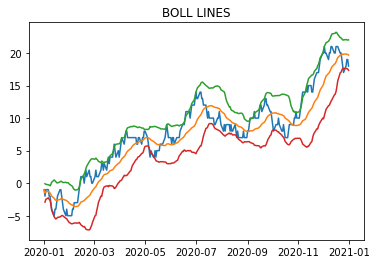

In [80]:
r = s.rolling('30D')
plt.plot(s)
plt.title('BOLL LINES')
plt.plot(r.mean())
plt.plot(r.mean()+r.std()*2)
plt.plot(r.mean()-r.std()*2)

`shift` फ़ंक्शन के लिए, `datetime64` द्वारा अनुक्रमित अनुक्रम पर कार्य करते समय, आप स्लाइडिंग के लिए `freq` इकाई निर्दिष्ट कर सकते हैं:

In [81]:
s.shift(freq='50D').head()

2020-02-20   -1
2020-02-21   -2
2020-02-22   -1
2020-02-25   -1
2020-02-26   -2
dtype: int32

इसके अलावा, `datetime64[ns]` के अनुक्रम पर `diff` निष्पादित करने के बाद, `timedelta64[ns]` का अनुक्रम प्राप्त किया जा सकता है, जो उपयोगकर्ताओं को आदेशित समय श्रृंखला के अंतराल को आसानी से देखने की अनुमति देता है:

In [82]:
my_series = pd.Series(s.index)
my_series.head()

0   2020-01-01
1   2020-01-02
2   2020-01-03
3   2020-01-06
4   2020-01-07
dtype: datetime64[ns]

In [83]:
my_series.diff(1).head()

0      NaT
1   1 days
2   1 days
3   3 days
4   1 days
dtype: timedelta64[ns]

### 2. पुनः नमूनाकरण

पुन: नमूनाकरण वस्तु `रीसैंपल` अध्याय 4 में ग्रुपिंग ऑब्जेक्ट `ग्रुपबाय` के समान है। पूर्व एक समूहीकरण वस्तु है जिसे समय श्रृंखला की समूह गणना के लिए डिज़ाइन किया गया है।

उदाहरण के लिए, उपरोक्त श्रृंखला के लिए हर 10 दिनों में माध्य की गणना करें:

In [84]:
s.resample('10D').mean().head()

2020-01-01   -2.000000
2020-01-11   -3.166667
2020-01-21   -3.625000
2020-01-31   -4.000000
2020-02-10   -0.375000
Freq: 10D, dtype: float64

उसी समय, यदि कोई अंतर्निहित परिभाषित प्रसंस्करण फ़ंक्शन नहीं है, तो आप इसे `लागू करें` विधि के माध्यम से अनुकूलित कर सकते हैं:

In [85]:
s.resample('10D').apply(lambda x:x.max()-x.min()).head() # 极差

2020-01-01    3
2020-01-11    4
2020-01-21    4
2020-01-31    2
2020-02-10    4
Freq: 10D, dtype: int32

`रीसैंपल` में समूह सीमा मानों के प्रसंस्करण पर विशेष ध्यान दें। डिफ़ॉल्ट रूप से, शुरुआती मूल्य की गणना न्यूनतम टाइमस्टैम्प के अनुरूप तिथि पर `00:00:00` से शुरू होकर `freq` को बढ़ाकर की जाती है। न्यूनतम टाइमस्टैम्प का अधिकतम टाइमस्टैम्प प्रारंभिक मान के रूप में संबंधित टाइमस्टैम्प है, और फिर `freq` पैरामीटर समूहीकरण के लिए एक विभाजन नोड के रूप में हर बार जमा होता है। अंतराल बाईं ओर बंद होता है और दाईं ओर खुला होता है। एक असमान उदाहरण नीचे बनाया गया है:

In [86]:
idx = pd.date_range('20200101 8:26:35', '20200101 9:31:58', freq='77s')
data = np.random.randint(-1,2,len(idx)).cumsum()
s = pd.Series(data,index=idx)
s.head()

2020-01-01 08:26:35   -1
2020-01-01 08:27:52   -1
2020-01-01 08:29:09   -2
2020-01-01 08:30:26   -3
2020-01-01 08:31:43   -4
Freq: 77S, dtype: int32

निम्नलिखित के अनुरूप पहले समूह का प्रारंभिक मान `08:24:00` है, जो उस दिन 0 बजे से 72 `freq=7 मिनट` जोड़कर प्राप्त किया जाता है। यदि एक और `freq` जोड़ा जाता है, तो अनुक्रम का न्यूनतम मान पार हो जाएगा `08:26:35`:

In [87]:
s.resample('7min').mean().head()

2020-01-01 08:24:00   -1.750000
2020-01-01 08:31:00   -2.600000
2020-01-01 08:38:00   -2.166667
2020-01-01 08:45:00    0.200000
2020-01-01 08:52:00    2.833333
Freq: 7T, dtype: float64

कभी-कभी, उपयोगकर्ता अनुक्रम के न्यूनतम टाइमस्टैम्प से शुरू करके `freq` को बढ़ाकर समूह बनाना चाहते हैं, इस मामले में, `origin` पैरामीटर को `start` के रूप में निर्दिष्ट किया जा सकता है:

In [88]:
s.resample('7min', origin='start').mean().head()

2020-01-01 08:26:35   -2.333333
2020-01-01 08:33:35   -2.400000
2020-01-01 08:40:35   -1.333333
2020-01-01 08:47:35    1.200000
2020-01-01 08:54:35    3.166667
Freq: 7T, dtype: float64

रिटर्न वैल्यू में, यह ध्यान दिया जाना चाहिए कि सूचकांक आम तौर पर समूह का पहला टाइमस्टैम्प है, लेकिन `एम, ए, क्यू, बीएम, बीए, बीक्यू, डब्ल्यू` संबंधित अंतराल का अंतिम टाइमस्टैम्प है:

In [89]:
s = pd.Series(np.random.randint(2,size=366), index=pd.date_range('2020-01-01', '2020-12-31'))
s.resample('M').mean().head()

2020-01-31    0.451613
2020-02-29    0.448276
2020-03-31    0.516129
2020-04-30    0.566667
2020-05-31    0.451613
Freq: M, dtype: float64

In [90]:
s.resample('MS').mean().head() # 结果一样，但索引不同

2020-01-01    0.451613
2020-02-01    0.448276
2020-03-01    0.516129
2020-04-01    0.566667
2020-05-01    0.451613
Freq: MS, dtype: float64

## 6. अभ्यास
### Ex1: सौर विकिरण डेटा सेट

सौर विकिरण पर एक डेटा सेट है:

In [91]:
df = pd.read_csv('../data/solar.csv', usecols=['Data','Time','Radiation','Temperature'])
df.head(3)

,Data,Time,Radiation,Temperature
0,9/29/2016 12:00:00 AM,23:55:26,1.21,48
1,9/29/2016 12:00:00 AM,23:50:23,1.21,48
2,9/29/2016 12:00:00 AM,23:45:26,1.23,48


1. `दिनांक, समय` को एक समय कॉलम `दिनांक समय` में मर्ज करें, और इसे सॉर्ट करने के लिए एक सूचकांक के रूप में उपयोग करें।
2. प्रत्येक रिकॉर्ड के बीच का समय अंतराल स्पष्ट रूप से सुसंगत नहीं है। कृपया निम्नलिखित समस्याओं का समाधान करें:
* अंतराल के पहले तीन अधिकतम मूल्यों के अनुरूप टाइमस्टैम्प के तीन सेट खोजें।
* क्या कोई अनुमानित सीमा है जिसमें अधिकांश अंतराल इसी सीमा के अंतर्गत आते हैं? यदि यह मौजूद है, तो कृपया इस सीमा में नमूना अंतराल सेकंड का एक हिस्टोग्राम बनाएं और `bins=50` सेट करें।
3. निम्नलिखित संकेतकों के अनुरूप 'श्रृंखला' खोजें:
* तापमान और विकिरण के बीच 6 घंटे का स्लाइडिंग सहसंबंध गुणांक
* तीन बजे, नौ बजे, पंद्रह बजे और इक्कीस बजे में विभाजित, समय अंतराल का तापमान माध्य क्रम जिसमें अवलोकन स्थित है
* प्रत्येक अवलोकन के लिए 6 घंटे पहले की विकिरण मात्रा (सामान्यतया, यह सटीक रूप से प्राप्त नहीं की जाएगी, इस मामले में, नवीनतम टाइमस्टैम्प के अनुरूप विकिरण मात्रा का उपयोग किया जाएगा)
### Ex2: फल बिक्री डेटा सेट

2019 में दैनिक फल बिक्री रिकॉर्ड तालिका है:

In [92]:
df = pd.read_csv('../data/fruit.csv')
df.head(3)

,Date,Fruit,Sale
0,2019-04-18,Peach,15
1,2019-12-29,Peach,15
2,2019-06-05,Peach,19


1. निम्नलिखित संकेतकों के आँकड़े:
* प्रत्येक माह की पहली छमाही (15 तारीख को या उससे पहले) और महीने की दूसरी छमाही में अंगूर की बिक्री का अनुपात
*प्रत्येक माह के अंतिम दिन नाशपाती की बिक्री का योग
*प्रत्येक माह के अंतिम कार्य दिवस पर नाशपाती की बिक्री का योग
* प्रत्येक माह के अंतिम पांच दिनों में सेब की औसत बिक्री
2. मासिक आधार पर सोमवार से रविवार तक प्रत्येक किस्म के फल के रिकॉर्ड की औसत संख्या की गणना करें, पंक्ति सूचकांक की बाहरी परत फल का नाम है, आंतरिक परत महीना है, और स्तंभ सूचकांक सप्ताह है .
3. दैनिक आधार पर पिछले 10 कार्य दिवसों के लिए Apple बिक्री औसत अनुक्रम की गणना करें, और गैर-कार्य दिवस मानों को पिछले कार्य दिवस के परिणामों से भरें।